## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', palette='Paired')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Import Dataset

In [3]:
# path dataset
path = '/content/R03_excercises.csv'

df = pd.read_csv(path)
# show top 5
df.head()

,Daily Exercise Time (X),Weight Loss (Y)
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3


In [4]:
# total jumlah data
df.shape

(74, 2)

In [5]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Daily Exercise Time (X)  74 non-null     float64
 1   Weight Loss (Y)          74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


dari info diatas kita dapat informasi berupa tipe data pada tiap fitur, total jumlah data dan memori yang digunakan

In [6]:
# descriptive statistic
df.describe()

,Daily Exercise Time (X),Weight Loss (Y)
count,74.000000,74.000000
mean,2.124324,1.001351
std,1.021121,0.567980
min,0.400000,0.200000
25%,1.225000,0.500000
50%,2.050000,1.000000
75%,2.975000,1.500000
max,3.900000,2.000000


Interpretasi:
1. Count: Menunjukkan jumlah data non-null untuk setiap kolom.
2. Mean: Rata-rata nilai dari setiap kolom.
3. Std: Deviasi standar, menunjukkan sebaran data dari rata-rata.
4. Min: Nilai minimum dari setiap kolom.
5. 25%, 50%, 75%: Kuartil data, menunjukkan distribusi data.
6. Max: Nilai maksimum dari setiap kolom.

## Data Preprocessing

In [7]:
# cek null value
df.isnull().sum()

,0
Daily Exercise Time (X),0
Weight Loss (Y),0


tidak ada null value pada dataset

In [8]:
# cek duplicated value
df.duplicated().sum()

30

In [9]:
# hapus duplicated value
df.drop_duplicates(inplace=True)
# cek total data setelah hapus duplicated value
df.shape[0]

44

## Data Modelling

In [11]:
# data splitting
X = df['Daily Exercise Time (X)']
y = df['Weight Loss (Y)']

# train test spl42t
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# inisialisasi decision tree
dt = DecisionTreeRegressor(random_state=42)

# fitting
dt.fit(X_train.values.reshape(-1, 1), y_train)

# prediksi
y_pred = dt.predict(X_test.values.reshape(-1, 1))

## Model Evaluation

In [13]:
# metric eval
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 0.08518518518518525
MSE: 0.010493827160493843
RMSE: 0.10243938285880994
R2 Score: 0.9713804713804713


Berdasarkan metrik yang diperoleh, model menunjukkan performa yang sangat baik dalam memprediksi data. MAE sebesar 0.0852 dan RMSE sebesar 0.1024 menunjukkan bahwa kesalahan prediksi relatif kecil, sementara MSE sebesar 0.0105 menegaskan bahwa model tidak banyak menghasilkan kesalahan besar. Selain itu, R2 score sebesar 0.9714 menunjukkan bahwa model mampu menjelaskan sekitar 97.14% dari variabilitas data, yang berarti model sangat efektif dalam menangkap pola yang ada. Secara keseluruhan, metrik ini mengindikasikan bahwa model memiliki akurasi tinggi dan dapat diandalkan untuk prediksi.

In [14]:
# feature importance
feature_importance = dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': ['Daily Exercise Time (X)'], 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,Daily Exercise Time (X),1.0


Berdasarkan hasil feature importance yang ditunjukkan, "Daily Exercise Time (X)" memiliki nilai penting sebesar 1.0, yang menunjukkan bahwa fitur ini adalah faktor utama yang berkontribusi terhadap variabel target "Weight Loss." Ini berarti bahwa waktu yang dihabiskan untuk berolahraga setiap hari memiliki pengaruh yang sangat signifikan dan langsung terhadap penurunan berat badan.

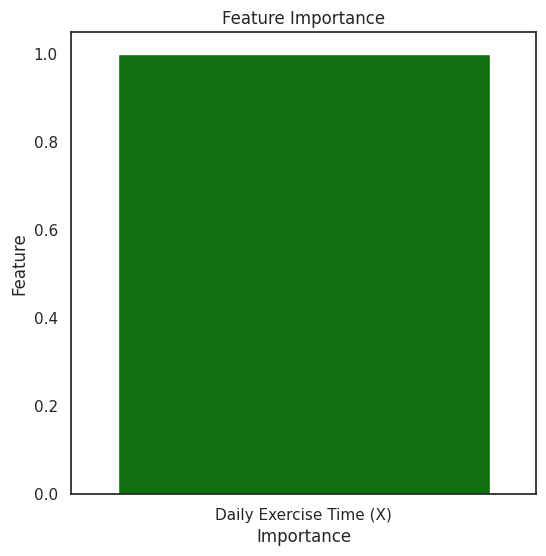

In [16]:
# visualisasi
plt.figure(figsize=(6, 6))
sns.barplot(y='Importance', x='Feature', data=feature_importance_df, color='g')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()